# K-Means Clustering

K-means clustering is a simple and effective algorithm for grouping data points into clusters without predefined labels. The process begins by selecting a specific number of clusters (K), which determines how many groups the data will be divided into.

1. **Initial Centroids:** Randomly place a centroid (a point representing the center of a cluster) for each cluster.
2. **Assign Points:** Each data point is then assigned to the nearest centroid based on its distance.
3. **Recalculate Centroids:** For each cluster, calculate the center of mass (the average of all points in that cluster) and move the centroid to this new position.
4. **Repeat:** The assignment of data points to centroids and recalculation of the centroids is repeated until the centroids no longer move.

Once the centroids stabilize, the process stops, and the clusters are finalized. The resulting clusters can then be interpreted based on the specific context, such as identifying customer groups in a business setting.

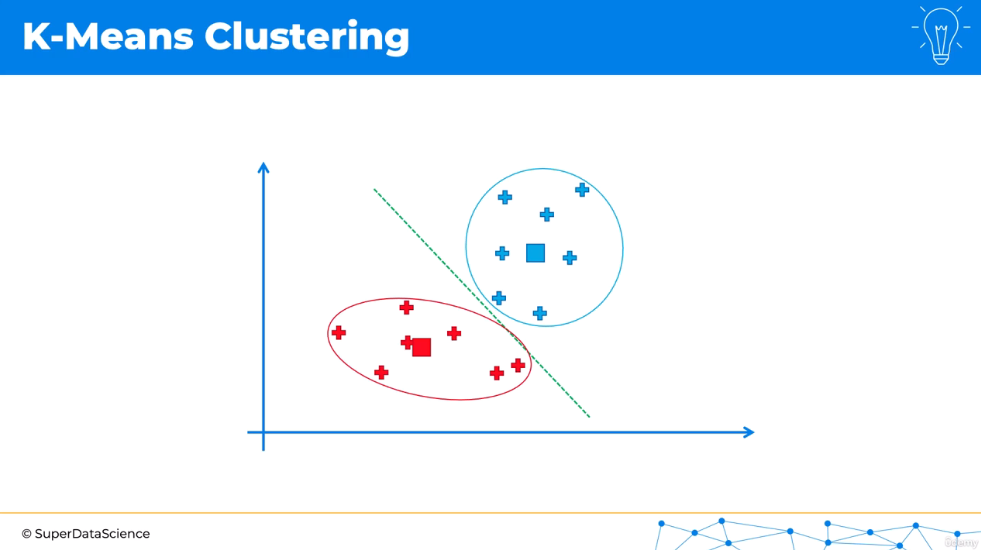

### The Elbow Method
The elbow method is a technique used to determine the optimal number of clusters for K-means clustering. The process involves running K-means multiple times with different numbers of clusters and calculating the **Within-Cluster Sum of Squares (WCSS)** for each. WCSS measures the squared distance between each point and the centroid of its cluster, with smaller WCSS values indicating tighter clusters.


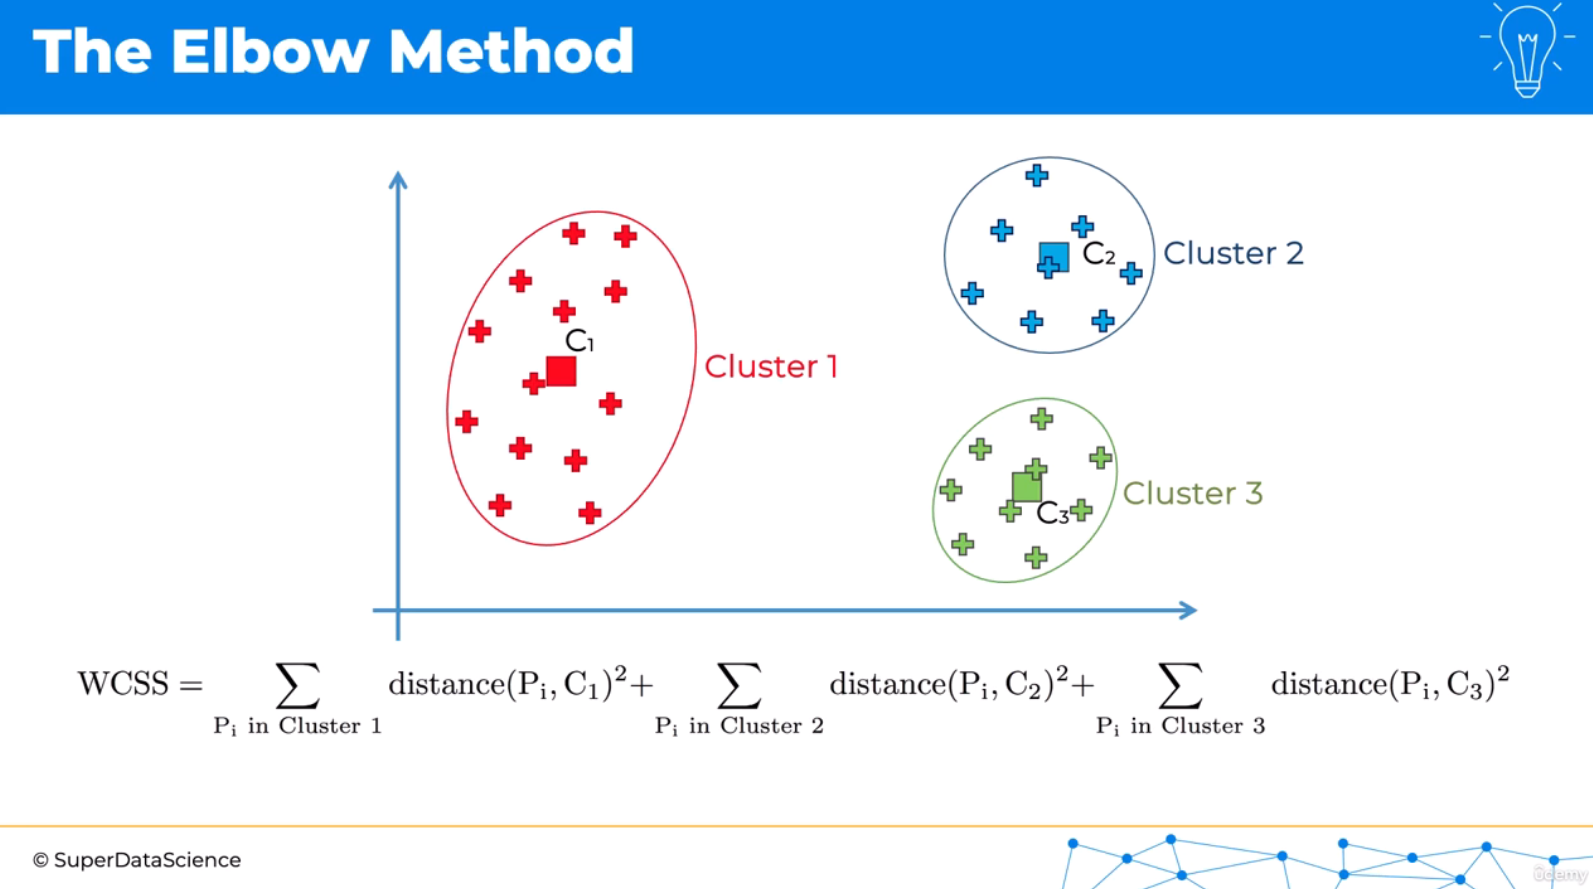


As you increase the number of clusters, WCSS decreases, because data points get closer to their centroids. However, beyond a certain point, adding more clusters doesn’t significantly reduce the WCSS. The elbow method involves plotting WCSS against the number of clusters and identifying the "elbow" point—where the rate of decrease sharply slows. This "elbow" is considered the optimal number of clusters because it balances model simplicity and performance.

While the elbow point is usually clear, it can sometimes be ambiguous, requiring the data scientist to make a judgment call.

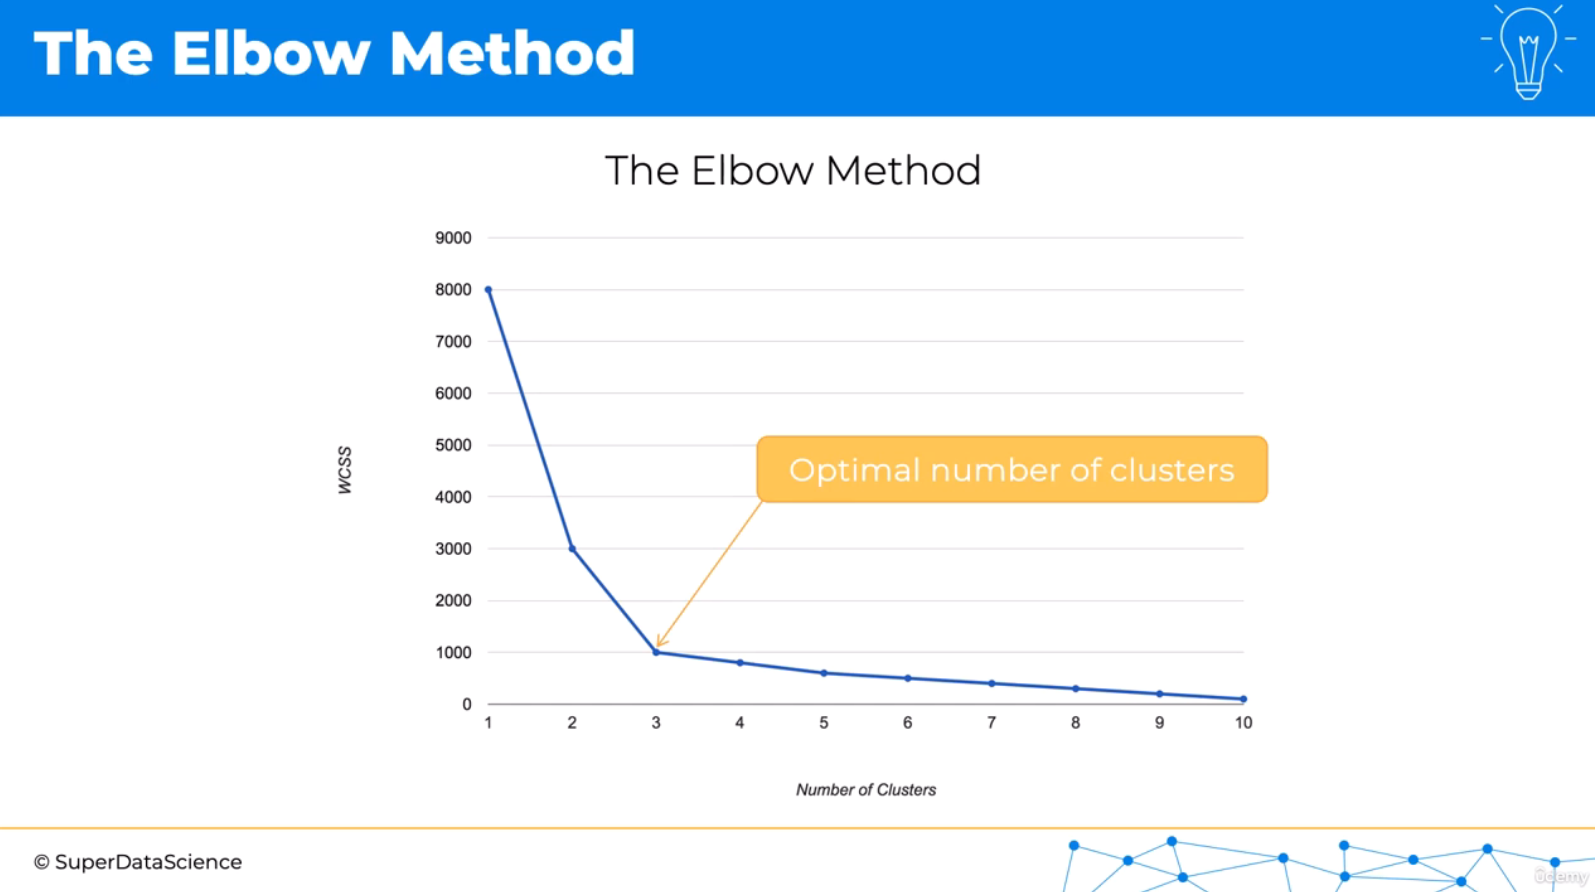

### Random Initialization Trap and K-Means++

The **Random Initialization Trap** occurs in K-means clustering when the initial placement of centroids is chosen randomly, leading to different clustering results across different runs of the algorithm. This randomness can cause inconsistent and suboptimal clustering, which is problematic because you want your results to be reliable and deterministic, providing meaningful insights regardless of how the centroids are initialized.


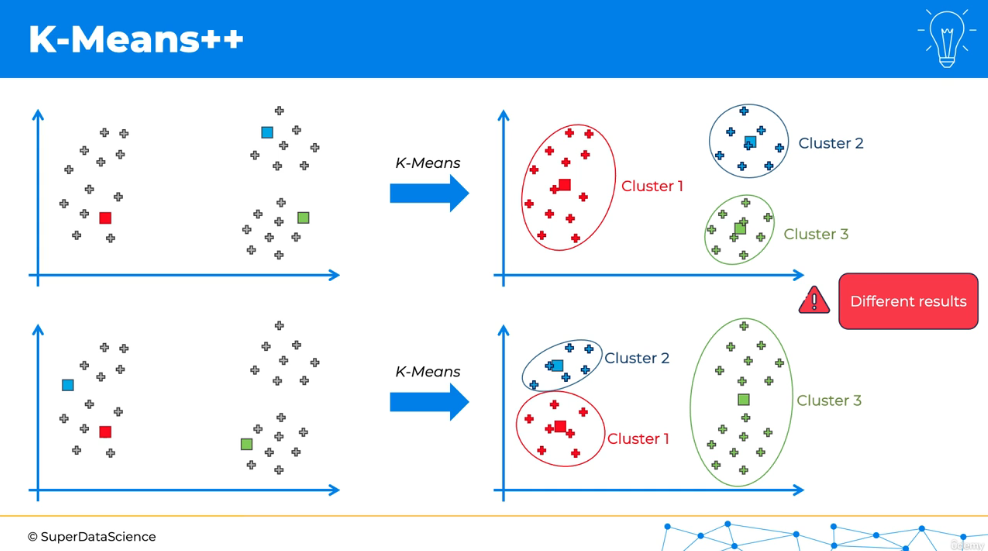



**K-Means++** is designed to address this issue. It improves the initialization of centroids to avoid poor clustering results by following these steps:
1. The first centroid is chosen at random.
2. For each of the remaining data points, compute the distance (D) to the nearest out of already selected centroids.
3. Choose next centroid among remaining data points using weighted random selection - weighted by D²: where points that are farther away from the existing centroids have a higher probability of being chosen.
4. Repeat Steps 2 and 3 until all k centroids have been selected.
5. Proceed with standard k-means clustering.

By spreading the centroids more intelligently, **K-Means++** reduces the chances of suboptimal clustering due to poor initial placement. While it doesn't fully eliminate the randomness, it significantly lowers the likelihood of falling into the Random Initialization Trap, leading to more stable and accurate clustering results.

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This dataset, titled "Mall Customers," was collected by the strategic team of a mall to better understand their customers. Each row represents a customer, and the dataset includes the following features: customer ID, gender (male or female), age, annual income, and a "spending score" (ranging from 1 to 100), which measures how much the customer spends. A higher spending score indicates a customer who spends more.

The goal of analyzing this data is to identify patterns among the mall's customers. Unlike regression or classification, where there is a specific prediction target, clustering in this case aims to uncover hidden patterns without a predefined outcome.

**The process involves creating a "dependent variable"** that represents different clusters or groups of customers. By applying K-Means clustering, the team will **categorize customers into a finite number of classes**, which will help them better understand their customer base and tailor strategies accordingly.

Note: we won't have to split the data set into the training set and test set because indeed getting a training set and the test set implies having a dependent variable containing the real results, and at this point, we don't have a dependent variable. We're just trying to identify one and to create one.

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning A-Z/Part 4 - Clustering/1 K-Means Clustering/Mall_Customers.csv')

# Selecting the Annual Income (column index 3) and Spending Score (column index 4) features
# These columns will be used for clustering
X = dataset.iloc[:, [3, 4]].values

- `dataset.iloc[:, [3, 4]]`:
  - The first part before the comma (`:`) indicates the **row selection**. Using `:` by itself means "select all rows."
  - The second part after the comma (`[3, 4]`) indicates the **column selection**. `[3, 4]` selects the 4th and 5th columns (because indexing starts at 0).


The reason behind selecting only two features, "annual income" and "spending score," from the dataset for clustering: While all features (like gender, age, etc.) could be relevant, the decision to use just these two is made to simplify visualization.

Since K-means clustering results can be visualized in a two-dimensional plot, it's easier to interpret the clusters with two features rather than trying to handle more dimensions, which would complicate the visualization.

Therefore, it is solely for didactic reasons.

## Using the elbow method to find the optimal number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

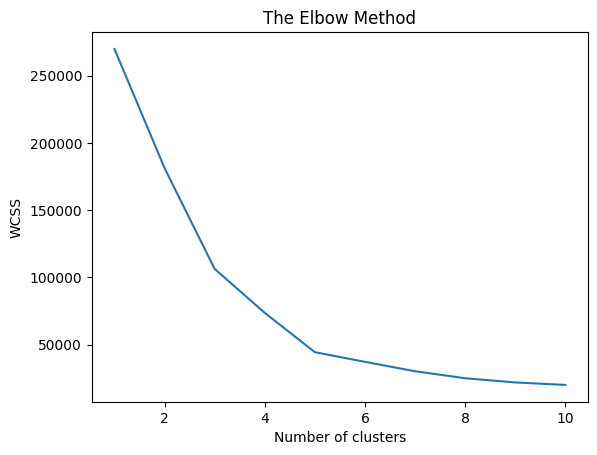

In [5]:
# Importing the KMeans class from sklearn's clustering module
from sklearn.cluster import KMeans

# Initializing an empty list to store the Within-Cluster Sum of Squares (WCSS)
wcss = []

# Looping over a range of cluster numbers from 1 to 10
for i in range(1, 11):

    # Initializing the KMeans algorithm with 'i' clusters, using k-means++ for centroid initialization
    # random_state ensures reproducibility of the results
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)

    # Fitting the KMeans algorithm to the data (X)
    kmeans.fit(X)

    # Appending the WCSS (inertia_) value (WCSS) to the list for the current number of clusters
    wcss.append(kmeans.inertia_)

# Plotting the WCSS values against the number of clusters to visualize the elbow point
plt.plot(range(1, 11), wcss)

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The optimal number of clusters in this case is **five**. This is determined by observing the elbow method graph, where the **WCSS** (Within Cluster Sum of Squares) starts to decrease more slowly after five clusters.

Prior to this, the WCSS drops significantly, but from five clusters onward, the decrease is much smaller, indicating the curve has flattened. Therefore, five clusters are optimal for training the K-means model in the next step.

## Training the K-Means model on the dataset

In [6]:
# Initialize the KMeans model with 5 clusters, using K-Means++ to initialize centroids to avoid the random initialization trap.
# 'random_state=42' ensures reproducibility of the results.
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

# Fit the KMeans model to the data in X and predict the cluster for each data point.
# 'y_kmeans' will contain the cluster index (0 to 4) for each data point.
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The `fit_predict` method is a useful feature in the scikit-learn K-Means API. This method both trains the K-Means model and returns a dependent variable that assigns each data point to a specific cluster.

In this case, the variable `y_kmeans` is created, which contains values corresponding to the five clusters identified in the dataset. Each customer in the dataset is assigned to one of these clusters based on their similarity to others in the same group.

The clusters are numbered starting from zero (so they are indexed as 0, 1, 2, 3, 4).

In [8]:
print(y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


## Visualising the clusters

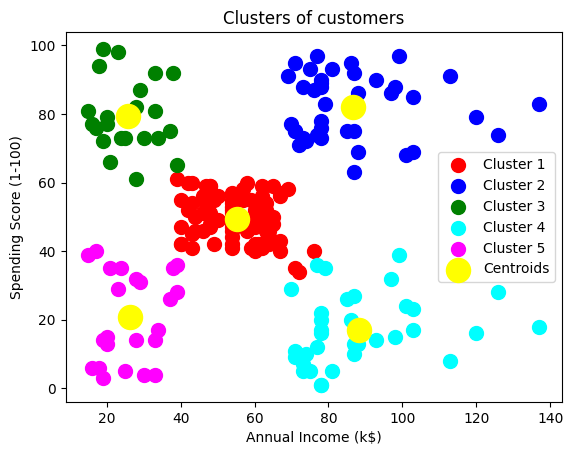

In [7]:
# Plot the data points belonging to Cluster 1 (identified by y_kmeans == 0).
# The X[..., 0] selects the Annual Income feature, and X[..., 1] selects the Spending Score.
# 's = 100' sets the size of the points, 'c = 'red'' sets the color, and 'label' assigns the label for Cluster 1.
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')

# Plot the data points belonging to Cluster 2 (identified by y_kmeans == 1).
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

# Plot the data points belonging to Cluster 3 (identified by y_kmeans == 2).
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

# Plot the data points belonging to Cluster 4 (identified by y_kmeans == 3).
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

# Plot the data points belonging to Cluster 5 (identified by y_kmeans == 4).
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

# Plot the centroids of all the clusters, stored in 'kmeans.cluster_centers_'.
# 's = 300' sets the size larger to make the centroids stand out, 'c = 'yellow'' sets the color, and 'label' gives the label for the centroids.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Now let's discuss how clustering analysis of mall customers can be used to create targeted business strategies. Five clusters are identified based on annual income and spending behavior:

1. **Cluster 5 (Low income, low spending)**: These customers earn little and spend little. They likely won’t be targeted much as they aren't high spenders.
2. **Cluster 4 (High income, low spending)**: These customers have high incomes but don't spend much. The mall might want to target them with better advertising to encourage higher spending.
3. **Cluster 3 (Low income, high spending)**: These customers have low incomes but spend a lot. The mall could consider limiting their exposure to new deals to protect them from overspending.
4. **Cluster 2 (High income, high spending)**: These customers are high earners and high spenders, making them ideal targets for new deals and offers to boost sales further.
5. **Average cluster 1 (Moderate income and spending)**: This group earns and spends an average amount, and while they could be targeted, the mall might not invest too heavily in them.

The key takeaway is that clustering allows for personalized marketing strategies, helping businesses boost sales while also being socially responsible by protecting vulnerable customers.